In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_pickle('learningObjectivesDf.pickle')

In [3]:
df2=pd.read_pickle('appmath.pkl')


In [4]:
df2.head(10)

,graph_id,course_id,section_id,user_id,registration_id,goal_id,path_id,path_type,adaptive_behavior,topic_id,lo_to_concept_blacklist,interaction_end_time,concept_id,concept_partner_id,concept_name,retail_lo_id,learning_objective_name,atom_id,retail_atom_id,variation_id,sequence_created_at,parent_sequence_id,sequence_instance_id,sequence_ordinal,recommendation_id,source,state,type,correct,time_spent_answering_s,time_spent_on_instruction_s,goal_progress,work_remaining,status,target_status_and_progress,prev_concept_narrative,current_concept_narrative,focused_concept_id,prev_lo_narrative,current_lo_narrative,focused_lo_id,focused_topic_id,duration_s,is_target
2739785,076e1a0e-669c-40c4-a23c-7ac2bbaa05cf,689c9d2c-b88e-40f1-9e5a-3a7193161cac,2dfdde50-72c3-4d49-8840-f0de82fedd0a,0012ff2b-871a-45d6-8e33-804f7464fa0a,0bbde3de-283b-4b08-a783-1a2942d07a2e,e359efc4-ed49-4227-a03e-c0c9358487d3,009f012a-30c9-42c5-94c6-3e05008ccfd0,REVIEW,None,d5743794-1f74-46ca-a538-8bf6c1cbb30b,NaN,2022-10-02 16:17:07.342,b7d9982e-26f9-47c0-b76f-cc9dc1f0bfbe,53568360-e9fe-465f-a8fc-1c75027cba94,Construct a truth table for a conditional stat...,53568360-e9fe-465f-a8fc-1c75027cba94,Construct a truth table for a conditional stat...,90bf68ef-fa40-4c57-9054-c417a848d897,5e457b03-88e7-4798-9c17-0c44a1c2d419,4ffcf121-73c3-4e21-adb9-d117faecffe9,2022-10-02 15:57:10.382,5baf1afa-5bc6-4c72-a7ac-b1bd4f180d22,c3b5bff2-e288-473d-bc1b-88c38be34d35,1,6.982368e+18,RECOMMENDATION,DONE,ASSESS,False,396.441010,24.492001,0.037663,-1.0,in_progress,{'53568360-e9fe-465f-a8fc-1c75027cba94': {'pro...,DIRECT_CHOOSE_TOPIC,DIRECT_DIAGNOSE_TOPIC,b7d9982e-26f9-47c0-b76f-cc9dc1f0bfbe,NONE,NONE,ff1bfcee-603f-4b08-924a-3852972fffab,tref-d5743794-1f74-46ca-a538-8bf6c1cbb30b,420.933014,True
1971810,076e1a0e-669c-40c4-a23c-7ac2bbaa05cf,689c9d2c-b88e-40f1-9e5a-3a7193161cac,2dfdde50-72c3-4d49-8840-f0de82fedd0a,0012ff2b-871a-45d6-8e33-804f7464fa0a,0bbde3de-283b-4b08-a783-1a2942d07a2e,e359efc4-ed49-4227-a03e-c0c9358487d3,009f012a-30c9-42c5-94c6-3e05008ccfd0,REVIEW,None,d5743794-1f74-46ca-a538-8bf6c1cbb30b,NaN,2022-10-02 16:17:42.073,b7d9982e-26f9-47c0-b76f-cc9dc1f0bfbe,53568360-e9fe-465f-a8fc-1c75027cba94,Construct a truth table for a conditional stat...,53568360-e9fe-465f-a8fc-1c75027cba94,Construct a truth table for a conditional stat...,49287c70-b63d-41be-9acc-24fd1f273158,614cad88-03e6-4c22-9689-aab68b3f23ba,5dd2e89c-bbcf-41ca-a91c-052010465d40,2022-10-02 16:17:07.893,a9af40ef-a988-4a30-b1fc-2344676d4cc7,408fc057-0815-4940-8ede-1ebe8207c1f0,1,6.982373e+18,RECOMMENDATION,DONE,ASSESS,True,26.042000,8.122000,0.533186,-1.0,in_progress,{'53568360-e9fe-465f-a8fc-1c75027cba94': {'pro...,DIRECT_DIAGNOSE_TOPIC,DIRECT_DIAGNOSE_TOPIC,b7d9982e-26f9-47c0-b76f-cc9dc1f0bfbe,NONE,NONE,ff1bfcee-603f-4b08-924a-3852972fffab,tref-d5743794-1f74-46ca-a538-8bf6c1cbb30b,34.164001,True
1518532,076e1a0e-669c-40c4-a23c-7ac2bbaa05cf,689c9d2c-b88e-40f1-9e5a-3a7193161cac,2dfdde50-72c3-4d49-8840-f0de82fedd0a,0012ff2b-871a-45d6-8e33-804f7464fa0a,0bbde3de-283b-4b08-a783-1a2942d07a2e,e359efc4-ed49-4227-a03e-c0c9358487d3,009f012a-30c9-42c5-94c6-3e05008ccfd0,REVIEW,None,d5743794-1f74-46ca-a538-8bf6c1cbb30b,NaN,2022-10-02 16:17:42.341,b7d9982e-26f9-47c0-b76f-cc9dc1f0bfbe,53568360-e9fe-465f-a8fc-1c75027cba94,Construct a truth table for a conditional stat...,53568360-e9fe-465f-a8fc-1c75027cba94,Construct a truth table for a conditional stat...,b2b1e778-26e0-4c99-ad3f-8ac5e8838a49,fa2a4b85-28c2-460d-b6ee-3e4686ad7db8,246cb150-9245-4042-b9b3-9392bab4ccfc,2022-10-02 16:17:42.341,340e10ca-1ab2-4559-8e89-4cd3eac53277,a3dbdfe0-2d1f-4b6b-927c-366acdbc0763,1,6.982373e+18,RECOMMENDATION,SHOWN,ASSESS,None,0.000000,0.000000,NaN,NaN,NaN,NaN,REVIEW_SWITCH,REVIEW_PRE_TEST,b7d9982e-26f9-47c0-b76f-cc9dc1f0bfbe,NONE,NONE,ff1bfcee-603f-4b08-924a-3852972fffab,tref-d5743794-1f74-46ca-a538-8bf6c1cbb30b,0.000000,True
2063269,076e1a0e-669c-40c4-a23c-7ac2bbaa05cf,689c9d2c-b88e-40f1-9e5a-3a7193161cac,2dfdde50-72c3-4d49-8840-f0de82fedd0a,0012ff2b-871a-45d6

In [105]:
df.graph_id.value_counts()

0     831
1      90
3      41
10     33
4      18
5      16
8      16
18     12
23     10
7       9
24      6
17      5
11      5
6       5
12      4
21      4
9       4
26      3
19      3
16      3
13      3
32      2
20      2
27      2
29      2
14      2
15      2
25      1
2       1
28      1
22      1
30      1
31      1
33      1
34      1
35      1
36      1
37      1
38      1
Name: graph_id, dtype: int64

In [137]:
df7=df[df.graph_id==11]

In [138]:
lo=np.unique([np.concatenate([df7['source_lo_title'].unique(),df7['dest_lo_title'].unique()])])

In [139]:
df3=df2[df2.learning_objective_name.isin(lo)].reset_index(drop=True)

In [140]:
df4=df3[df3.correct.isna()].reset_index(drop=True)

In [141]:
atoms=df4.atom_id.unique()

In [142]:
atoms

['1b2d864b-56c3-44d0-8435-a4f1aa28bba8', '62eedf26-cf50-4303-88ff-a4bb3e69154b', '1760b238-e6be-4fbe-9ebc-6c4e5c9b4aa2', '555c6d55-0e38-4e8d-b35c-fe526a0478e9', '5389306e-70cd-4204-88e4-d823667e4c83', ..., '71cd0fb6-55b6-4288-818d-d85708bb09a2', '0171638e-7305-48fa-97da-32bb8e09ae2e', '9d43699c-b501-400d-a630-a8155cf7fe45', '7f5e28d4-6988-4feb-a230-429456088f93', '04312f61-5925-4cb0-956f-5c5e99804574']
Length: 14
Categories (18258, object): ['000361fc-3126-4f25-93da-3ee3b66021c4', '000785e5-46df-4d0b-a12d-2283db4b8c7f', '000da431-9e35-4309-a3ae-cca9225b8d54', '00170926-4ba4-4d1e-bd86-0ac94107acb1', ..., 'fff4801c-d828-453e-b1d4-64369f7b1048', 'fff652bc-b348-4054-9aab-8e67b98b022a', 'fffbe876-95cc-4dd0-9097-c657f446df6a', 'fffd03c7-5c73-41e2-ae82-7c5146120a29']

In [143]:
df5=df4[['learning_objective_name','atom_id']].drop_duplicates()

In [183]:
legend_elements = [Line2D([0], [0], marker='o', color='w', label='learning_objective',
                          markerfacecolor='darkviolet', markersize=100),
                   Line2D([0], [0], marker='o', color='w', label='question',
                          markerfacecolor='royalblue', markersize=100)]

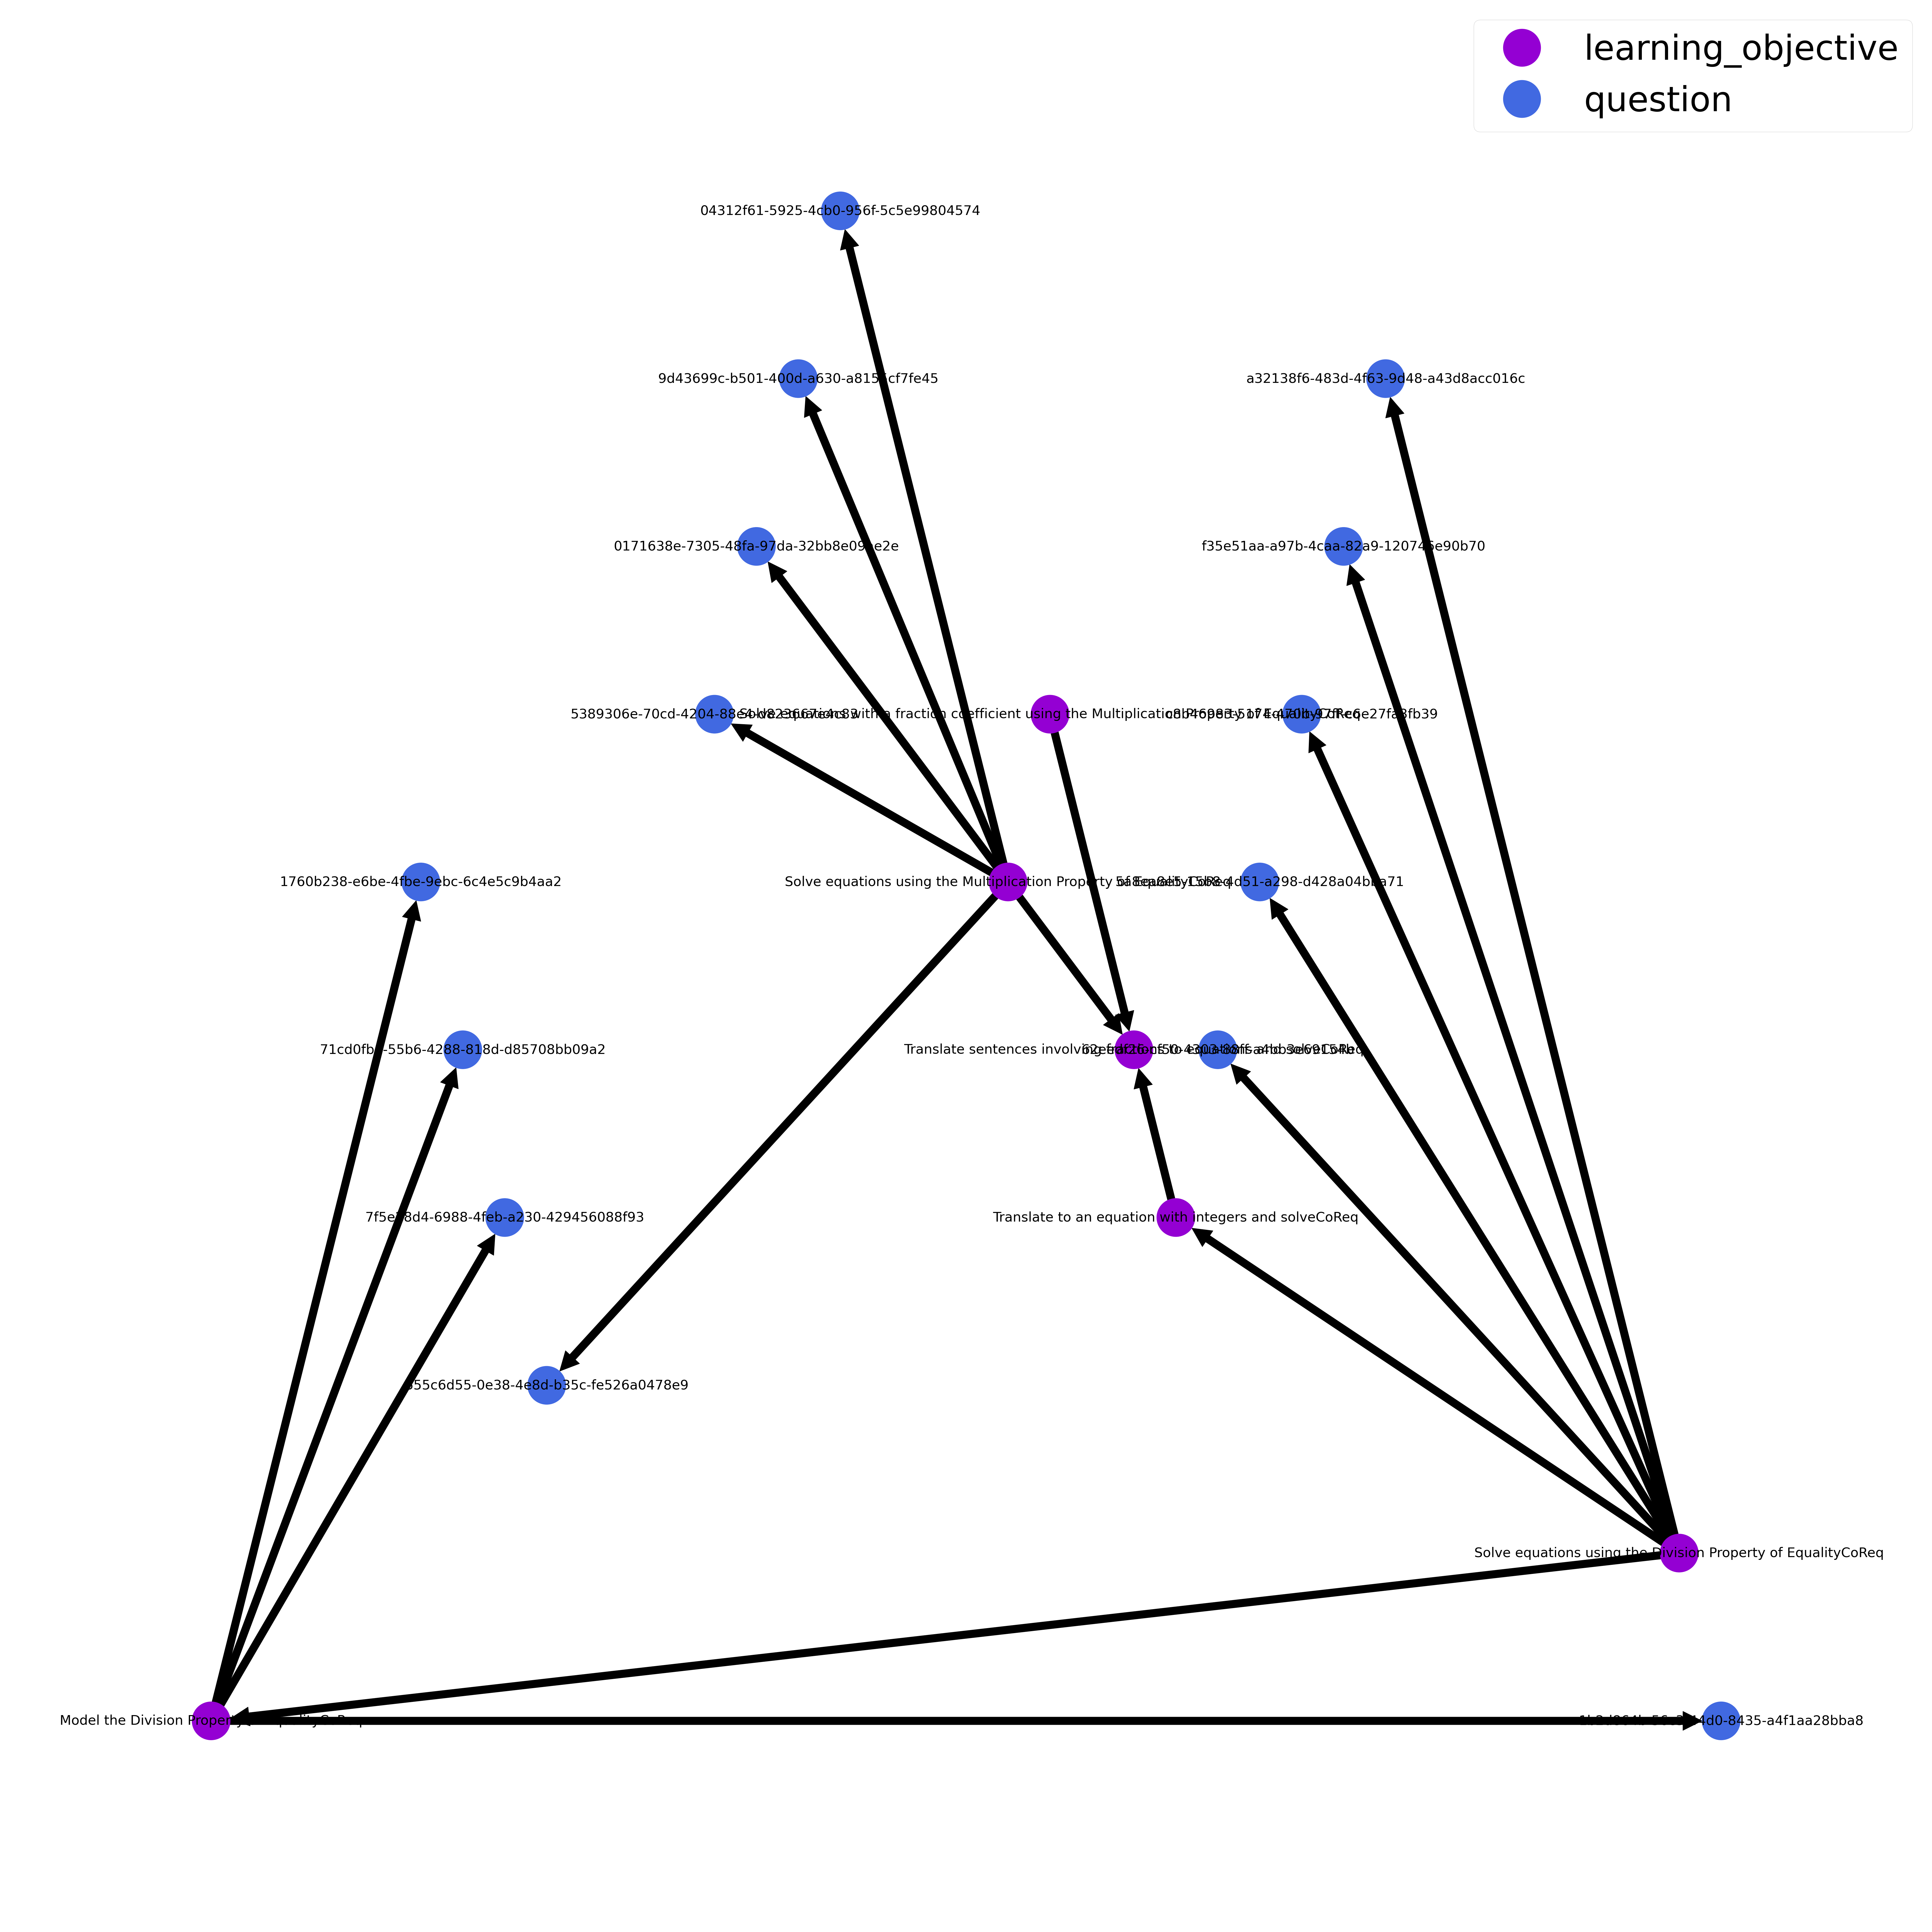

In [188]:
G=nx.DiGraph()

for i in lo:
    G.add_node(i,color='darkviolet')

for i in atoms:
    G.add_node(i,color='royalblue')

for _,i in df7.iterrows():
    G.add_edge(i['source_lo_title'],i['dest_lo_title'])



for _,i in df5.iterrows():
    G.add_edge(i['learning_objective_name'],i['atom_id'])

pos = nx.planar_layout(G)

colors =  [node[1].get('color') for node in G.nodes(data=True)]
fig = plt.figure(1, figsize=(70, 70), dpi=100) #30,20

nx.draw(G,pos,font_size=35,with_labels=True, node_color=colors,node_size=10000,arrowsize=100, arrowstyle='simple') #10
ax = plt.gca()
ax.margins(0.08)
ax.legend(handles=legend_elements, loc=1, fontsize="90")
plt.savefig('sample')